**Name: Tarushi Jat**

**Roll No.: 202IT029**

**Course: IT752 - Web & Social Computing**


## **Required Libraries**

In [ ]:
#@tarushi
import matplotlib.pyplot as plt
import networkx as nx

import pandas as pd
import csv
from operator import itemgetter
from networkx.algorithms import community

## **Insight of Soc-Sign-Bitcoin Dataset**

In [ ]:
G= nx.read_edgelist('/content/drive/MyDrive/WebComputing/Assignment/Assignemnt-1/soc-sign-bitcoin.txt')

print("Total number of nodes: ", int(G.number_of_nodes())) 
print("Total number of edges: ", int(G.number_of_edges()))


Total number of nodes:  5881
Total number of edges:  21492


In [ ]:
#@tarushi
print("List of all nodes: ", list(G.nodes())) 
print("List of all edges: ", list(G.edges(data = True))) 
print("Degree for all nodes: ", dict(G.degree())) 

List of all nodes:  ['6', '2', '5', '1', '15', '4', '3', '13', '16', '10', '7', '21', '20', '8', '17', '23', '25', '26', '28', '29', '31', '32', '34', '35', '36', '37', '44', '39', '45', '19', '46', '47', '51', '52', '53', '54', '41', '55', '57', '61', '65', '56', '66', '69', '70', '71', '72', '74', '75', '68', '64', '76', '77', '78', '60', '79', '80', '81', '62', '83', '104', '86', '87', '89', '94', '95', '96', '97', '99', '88', '101', '100', '103', '105', '106', '107', '108', '109', '110', '111', '112', '115', '114', '119', '122', '127', '129', '116', '131', '132', '133', '113', '125', '135', '134', '137', '138', '140', '141', '139', '142', '143', '144', '145', '146', '147', '148', '93', '149', '150', '152', '153', '154', '155', '156', '157', '158', '160', '161', '162', '163', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '159', '182', '183', '184', '185', '186', '187', '33', '188', '189', '190', '191', '192', '

In [ ]:
#@tarushi
print("Total number of self-loops: ", int(nx.number_of_selfloops(G))) 
print("List of all nodes with self-loops: ", 
             list(nx.nodes_with_selfloops(G))) 

Total number of self-loops:  0
List of all nodes with self-loops:  []


In [ ]:
#@tarushi
print("List of all nodes we can go to in a single step from node 6: ", 
                                                 list(G.neighbors('6'))) 

List of all nodes we can go to in a single step from node 6:  ['2', '5', '10', '4', '32', '7', '35', '114', '77', '173', '258', '268', '219', '198', '1', '664', '937', '384', '521', '280', '687', '1386', '537', '1317', '1566', '149', '2034', '2455', '1383', '425', '1810', '2028', '1363', '1018', '1832', '1624', '550', '1331', '2642', '856', '2188', '2187', '1752', '3810', '3129', '2244', '135', '13', '2067', '1318', '4385', '2524', '3988', '1352', '96']


## **Average Degree**

In [ ]:
#@tarushi
with open('/content/drive/MyDrive/WebComputing/Assignment/Assignemnt-1/soc-sign-bitcoinotc.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes] # Get a list of only the node names

with open('/content/drive/MyDrive/WebComputing/Assignment/Assignemnt-1/soc-sign-bitcoinotc.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data

In [ ]:
G = nx.Graph()

In [ ]:
G.add_nodes_from(node_names)
G.add_edges_from(edges)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 5881
Number of edges: 21492
Average degree:   7.3090


## **Degree distribution**

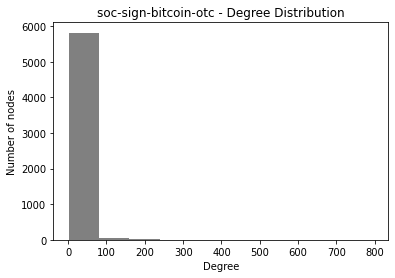

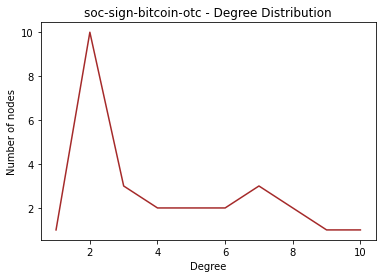

In [ ]:
#@tarushi
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees,color="gray")
    plt.xlabel("Degree")
    plt.ylabel("Number of nodes")
    plt.title("soc-sign-bitcoin-otc - Degree Distribution")
    plt.show()

plot_degree_dist(nx.read_edgelist('/content/drive/MyDrive/WebComputing/Assignment/Assignemnt-1/soc-sign-bitcoin.txt'))


degrees=nx.degree(G)
all_degrees=list(dict(degrees).values())

#print all_degrees
unique_degrees=list(set(all_degrees))

#print unique_degrees
count_degrees = []
for i in unique_degrees:
  count=all_degrees.count(i)
  count_degrees.append(count)
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.title("soc-sign-bitcoin-otc - Degree Distribution")
plt.plot(unique_degrees,count_degrees,color="brown")
plt.show()

## **Sparseness**

In [ ]:
#@tarushi

#G= nx.read_edgelist('/content/drive/MyDrive/WebComputing/Assignment/Assignemnt-1/soc-sign-bitcoin.txt')

nx.density(G)

0.001243020588612932

## **Diameter**

In [ ]:
# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G)
largest_component = max(components, key=len)

In [ ]:
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

Network diameter of largest component: 9


## **Geodesic path length**

In [ ]:
#@tarushi
with open('/content/drive/MyDrive/WebComputing/Assignment/Assignemnt-1/soc-sign-bitcoinotc.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes] # Get a list of only the node names

with open('/content/drive/MyDrive/WebComputing/Assignment/Assignemnt-1/soc-sign-bitcoinotc.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data

In [ ]:
#@tarushi
M = nx.Graph()

In [ ]:
#@tarushi
M.add_nodes_from(node_names)
M.add_edges_from(edges)

In [ ]:
#@title tarushi


G=nx.read_edgelist('/content/drive/MyDrive/WebComputing/Assignment/Assignemnt-1/soc-sign-bitcoinotc.csv')
print(nx.shortest_path_length(M,source='6',target='371'))        #(graph, source_node, dest_node)


G=nx.path_graph('/content/drive/MyDrive/WebComputing/Assignment/Assignemnt-1/soc-sign-bitcoinotc.csv')
print('Average shortest path length:')
print(nx.average_shortest_path_length(G))

2
Average shortest path length:
2.3433333333333333


## **Strongly Connected Components**

In [ ]:
#@tarushi
df = pd.read_csv("/content/drive/MyDrive/WebComputing/Assignment/Assignemnt-1/soc-sign-bitcoinotc.csv")
G = nx.from_pandas_edgelist(df,'src','dst',edge_attr=None,create_using=nx.DiGraph())

for c in nx.strongly_connected_components(G):
 print(c)


p= nx.number_strongly_connected_components(G)
print("Number of Strongly Connected Components:- ",p)

{25}
{3}
{16}
{103}
{315}
{1367}
{220}
{20}
{5775}
{3260}
{483}
{197}
{281}
{1155}
{730}
{1509}
{858}
{1238}
{1532}
{2181}
{1173}
{949}
{834}
{1076}
{2864}
{1643}
{669}
{2198}
{2209}
{1475}
{1791}
{2511}
{3437}
{2060}
{2259}
{504}
{3097}
{2455}
{2331}
{1327}
{1329}
{2634}
{2548}
{2629}
{2633}
{2697}
{2698}
{2694}
{2695}
{2704, 2705}
{2703}
{2721}
{2752}
{2689}
{2741}
{2749}
{2746, 2747}
{2745}
{2744}
{2673}
{2722}
{2736, 2735}
{2712, 2717, 2718}
{2753}
{2760}
{3782}
{1140}
{1141}
{1142}
{1144}
{1680}
{1663}
{2498}
{2245}
{1737}
{1669, 1703}
{2602}
{2604}
{2621}
{2622, 2623}
{4182}
{4135}
{3403}
{3428}
{4567}
{2935}
{2970}
{4012}
{1772}
{3132}
{3134}
{3931}
{3932}
{3256}
{3938}
{3940}
{3866}
{3357}
{4288}
{4289}
{3971}
{4151}
{2338}
{4509}
{4739}
{3436}
{5799}
{5551}
{4706}
{2926}
{2465}
{3743}
{1877}
{3025}
{3066}
{3375}
{4399}
{3513}
{5183}
{5189}
{2815}
{5517}
{2921}
{2922, 2919}
{5477}
{5097}
{5216, 5215}
{5488}
{5204}
{5807}
{5346}
{5749}
{4211}
{4823}
{5561}
{5533}
{5532}
{5571}
{

## **K-Connectedness**

In [ ]:
#@tarushi

df = pd.read_csv("/content/drive/MyDrive/WebComputing/Assignment/Assignemnt-1/soc-sign-bitcoinotc.csv")
G = nx.from_pandas_edgelist(df,'src','dst',edge_attr=None)

for c in nx.connected_components(G):
 print(c)


p= nx.number_connected_components(G)
print("Number of Connected Components:- ",p)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15, 16, 17, 19, 20, 21, 23, 25, 26, 28, 29, 31, 32, 33, 34, 35, 36, 37, 39, 41, 44, 45, 46, 47, 51, 52, 53, 54, 55, 56, 57, 60, 61, 62, 64, 65, 66, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 83, 86, 87, 88, 89, 93, 94, 95, 96, 97, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 119, 120, 122, 125, 127, 129, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 

### **Visualization of Connectected Components**

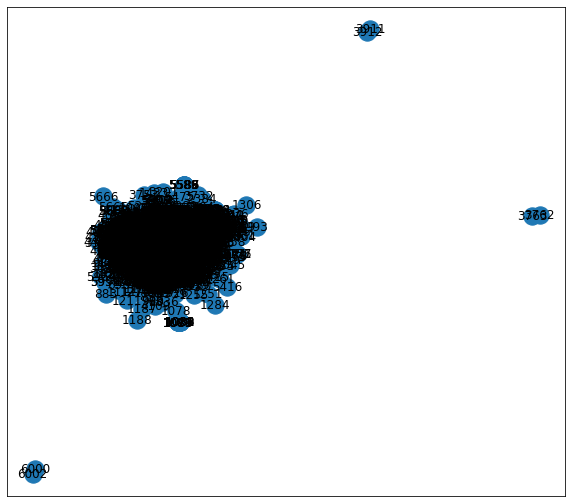

In [ ]:
#@tarushi
plt.figure(figsize = (10,9))
nx.draw_networkx(G)
plt.savefig("/content/drive/MyDrive/WebComputing/Assignment/Assignemnt-1/map_1.png", format = "png", dpi = 300)
plt.show()

## **Clustering Coefficient & Average Clustering Coefficient**

In [ ]:
#@tarushi
G= nx.read_edgelist('/content/drive/MyDrive/WebComputing/Assignment/Assignemnt-1/soc-sign-bitcoin.txt')

for i in nx.clustering(G).items():
  print (i)
print ("average clustering coefficient:")
print (nx.average_clustering(G))


Streaming output truncated to the last 5000 lines.
('936', 0)
('937', 0.05263157894736842)
('885', 0.06666666666666667)
('938', 0)
('923', 0.06060606060606061)
('939', 0)
('940', 0)
('942', 0)
('943', 0)
('944', 0)
('946', 0)
('947', 0)
('889', 0)
('941', 0)
('948', 0.16666666666666666)
('949', 0)
('950', 0.16666666666666666)
('951', 0)
('952', 0)
('954', 0)
('932', 1.0)
('955', 0)
('956', 0)
('957', 0)
('959', 0.3333333333333333)
('960', 0)
('961', 0.16666666666666666)
('963', 0)
('964', 0)
('966', 0)
('967', 0.03636363636363636)
('968', 0)
('935', 0.19047619047619047)
('965', 0)
('969', 0)
('825', 0)
('970', 0)
('971', 0)
('972', 0.03571428571428571)
('973', 0)
('974', 0)
('975', 0.1)
('976', 0)
('977', 0)
('953', 0)
('978', 0.008333333333333333)
('979', 0)
('980', 0)
('981', 0)
('982', 0)
('983', 0)
('984', 0.4)
('985', 0)
('986', 0)
('987', 0)
('988', 0.07692307692307693)
('989', 0)
('990', 0)
('991', 0)
('993', 0)
('994', 0)
('995', 0)
('905', 0.04884404388714734)
('996', 0)
('997